In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
df = pd.read_csv(
    'nyc_bb_bicyclist_counts.csv',
    header=0, 
    parse_dates=[0], 
    index_col=[0],
    date_format="%d-%b-%y"
)

In [65]:
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day
df['INTERCEPT'] = 1

In [67]:
# GLM Model - Poisson Family (example for count data)
model = sm.GLM(df['BB_COUNT'], df[['INTERCEPT', 'MONTH', 'DAY_OF_WEEK', 'DAY']], family=sm.families.Poisson())
result = model.fit()

In [69]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  214
Model:                            GLM   Df Residuals:                      210
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34552.
Date:                Tue, 03 Dec 2024   Deviance:                       67041.
Time:                        17:17:15   Pearson chi2:                 5.57e+04
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
INTERCEPT       7.7389      0.006   1342.180      

In [71]:
# Add predicted values to the DataFrame
df['PREDICTED'] = result.predict()

In [73]:
### Linear Regression ###
linear_model = sm.OLS(df['BB_COUNT'], df[['INTERCEPT', 'MONTH', 'DAY_OF_WEEK', 'DAY']])
linear_result = linear_model.fit()

In [75]:
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:               BB_COUNT   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.787
Date:                Tue, 03 Dec 2024   Prob (F-statistic):             0.0113
Time:                        17:17:18   Log-Likelihood:                -1742.2
No. Observations:                 214   AIC:                             3492.
Df Residuals:                     210   BIC:                             3506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
INTERCEPT    2272.6277    248.064      9.161      

In [77]:
# Linear Regression Predictions
df['LINEAR_PREDICTED'] = linear_result.predict()

In [83]:
### Comparison of Metrics ###
# GLM Metrics
glm_mse = mean_squared_error(df['BB_COUNT'], df['PREDICTED'])
glm_r2 = r2_score(df['BB_COUNT'], df['PREDICTED'])

In [85]:
print("Linear Regression Model Summary:\n", linear_result.summary())
print(f"Linear Regression MSE: {linear_mse:.2f}, R²: {linear_r2:.2f}\n")

Linear Regression Model Summary:
                             OLS Regression Results                            
Dep. Variable:               BB_COUNT   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.787
Date:                Tue, 03 Dec 2024   Prob (F-statistic):             0.0113
Time:                        17:18:43   Log-Likelihood:                -1742.2
No. Observations:                 214   AIC:                             3492.
Df Residuals:                     210   BIC:                             3506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
INTERCEPT    227

NameError: name 'linear_mse' is not defined

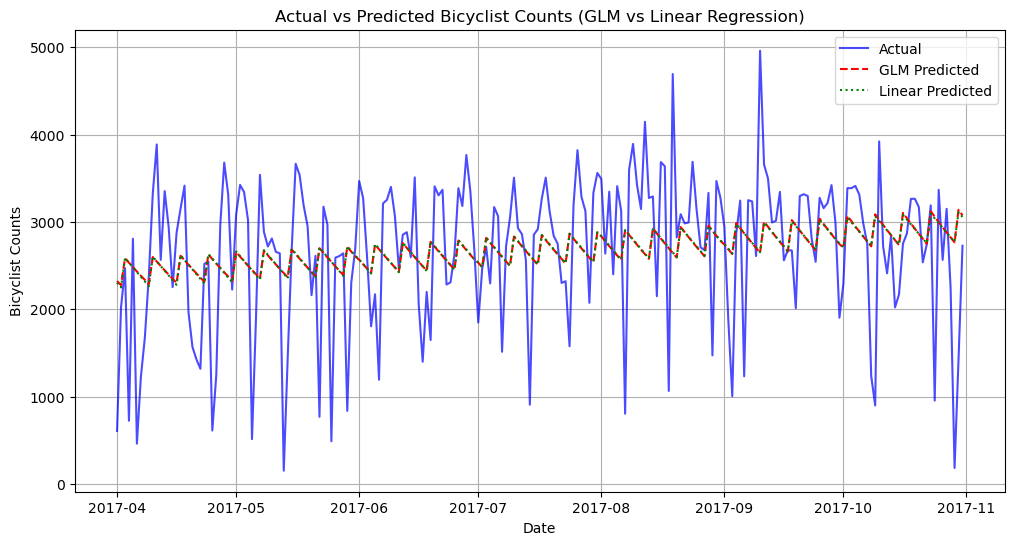

In [93]:
# Plot 1: Actual vs Predicted for Both Models
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['BB_COUNT'], label="Actual", color="blue", alpha=0.7)
plt.plot(df.index, df['PREDICTED'], label="GLM Predicted", color="red", linestyle="--")
plt.plot(df.index, df['LINEAR_PREDICTED'], label="Linear Predicted", color="green", linestyle=":")
plt.title("Actual vs Predicted Bicyclist Counts (GLM vs Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Bicyclist Counts")
plt.legend()
plt.grid(True)
plt.show()

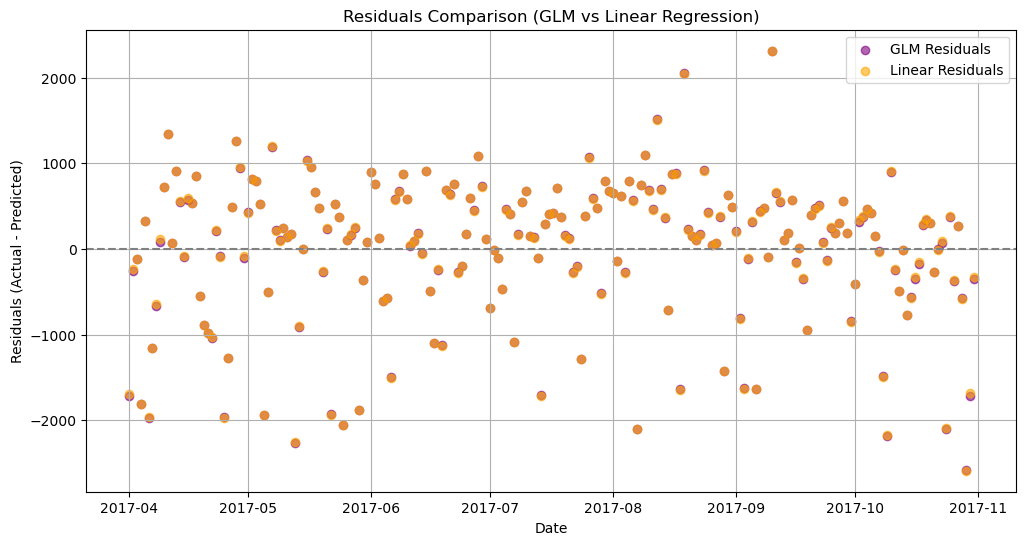

In [95]:
# Plot 2: Residuals Comparison
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['BB_COUNT'] - df['PREDICTED'], label="GLM Residuals", alpha=0.6, color="purple")
plt.scatter(df.index, df['BB_COUNT'] - df['LINEAR_PREDICTED'], label="Linear Residuals", alpha=0.6, color="orange")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residuals Comparison (GLM vs Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()
